## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import binom, chi2, chi2_contingency

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


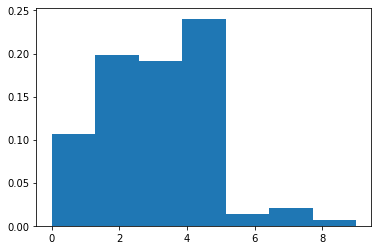

In [4]:
s = np.random.poisson(3, 110)
count, bins, ignored = plt.hist(s,7, normed=True)

## Question 2
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table2.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [12]:
# your code here

data = [[0, 32], [1, 15], [3, 9], [4,4]] 

ds = pd.DataFrame(data, columns = ["defective_items","freq"])
ds

,defective_items,freq
0,0,32
1,1,15
2,3,9
3,4,4


In [11]:
loc, scale = stats.norm.fit(ds['freq'])
n = stats.norm(loc=loc, scale=scale)
stats.kstest(ds['freq'], n.cdf)

KstestResult(statistic=0.25, pvalue=0.9639452436648751)

## Question 3
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table3.png)


In [13]:
# your answer here

n = 10
p = 0.05

expected_values = binom.rvs(n, p, size=200)

expected_values = expected_values.tolist()

observed_values = ([0]*138) + ([1]*53) + ([2]*9)

stats.chisquare(observed_values, f_exp=expected_values)

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=nan, pvalue=nan)

In [14]:
#José pls send me the explanation for this!!

## Question 4
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [18]:
#your answer here

#this didn't work for the life of it.... HELP!
